In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest

warnings.filterwarnings( "ignore")

### Задание 1

Загрузим данные и посмотрим, что они из себя представляют.

In [2]:
data = pd.read_csv(datasets.load_boston()["filename"], skiprows = 1)

In [3]:
print(datasets.load_boston()["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Как видно, пустых значений нету.

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Посмотрим на статистические значения переменных.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Посмотрим на количество уникальных значений.  

In [7]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Посмотрим более подробно на каждый признак.

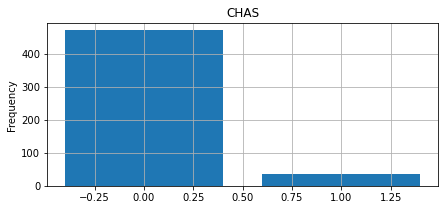

CHAS: 
0    471
1     35
Name: CHAS, dtype: int64


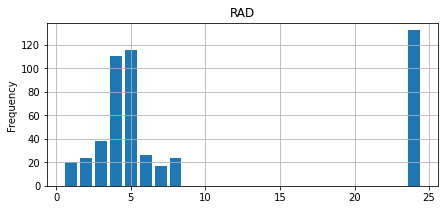

RAD: 
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64


In [8]:
def bar_plot(dataset, feature):
    var = dataset[feature]
    varValue = var.value_counts()
    
    plt.figure(figsize = (7, 3))
    plt.bar(varValue.index, varValue)
    plt.ylabel("Frequency")
    plt.title(feature)
    plt.grid()
    plt.show()
    print(f"{feature}: \n{varValue}")
    

features = ["CHAS", "RAD"]
for feature in features:
    bar_plot(data, feature)

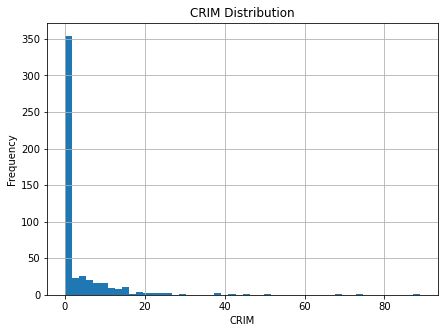

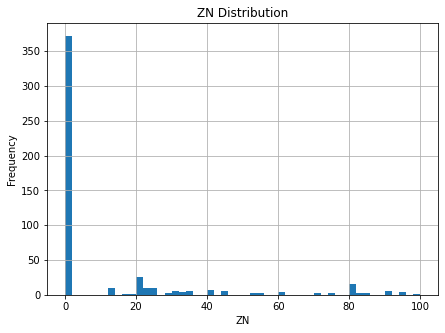

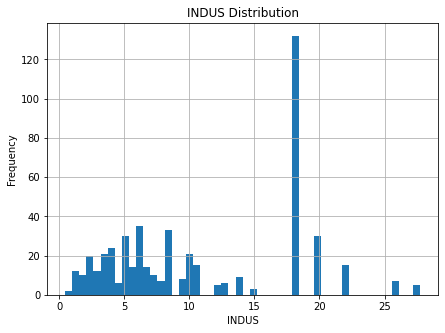

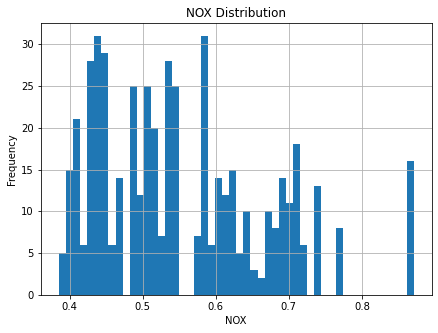

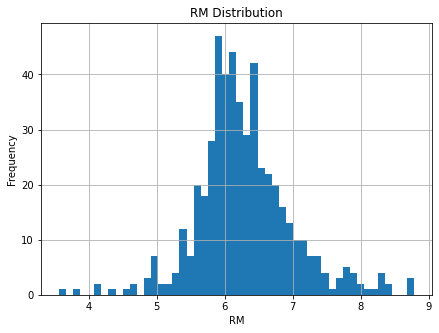

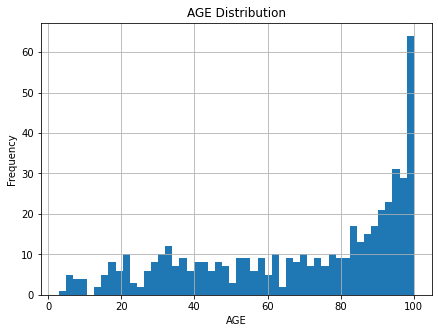

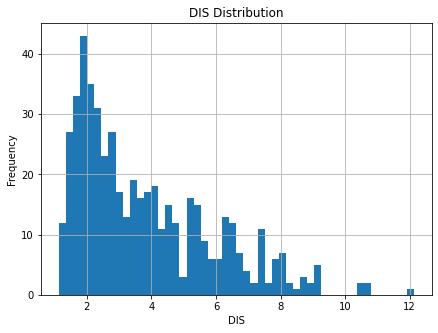

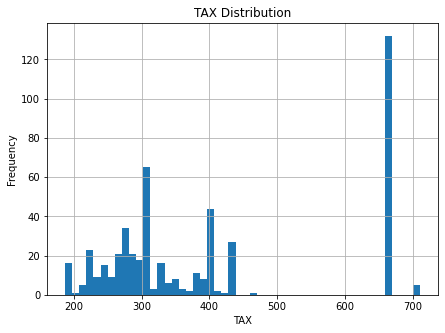

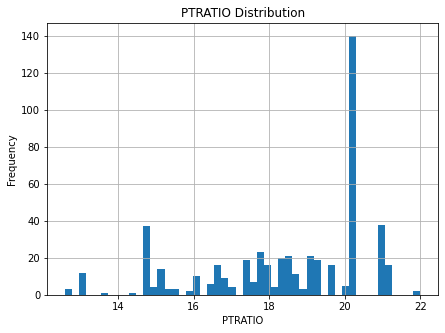

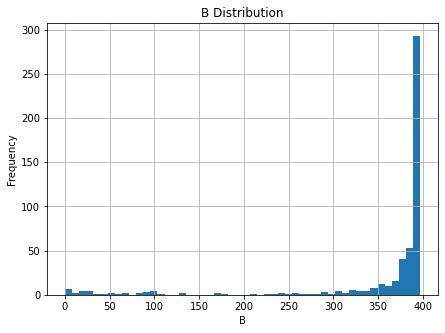

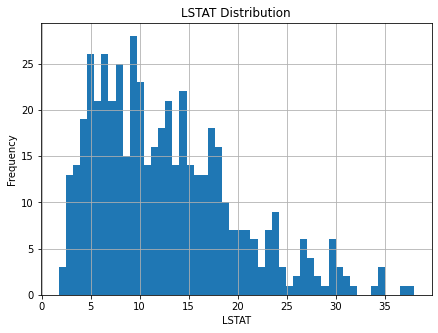

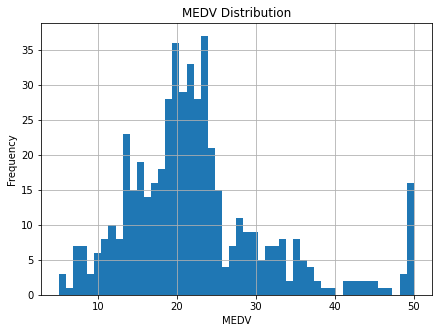

In [9]:
def hist_plot(dataset, feature):    
    plt.figure(figsize = (7, 5))
    plt.hist(dataset[feature], bins = 50)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"{feature} Distribution")
    plt.grid()
    plt.show()


features = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
for feature in features:
    hist_plot(data, feature)

Посмотрим, как признаки друг с другом коррелируют.

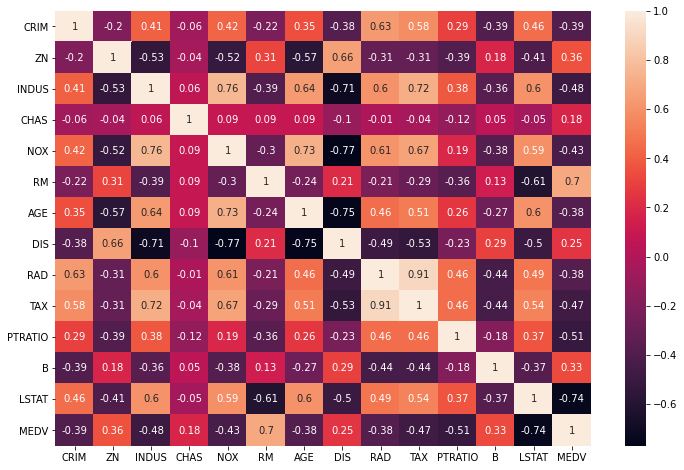

In [10]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr().round(2), annot = True)
plt.show()

Посмотрим на выбросы, но удалять ничего не будем. Создадим дополнительное поле с рангом выброса, возможно это как-то поможет модели.

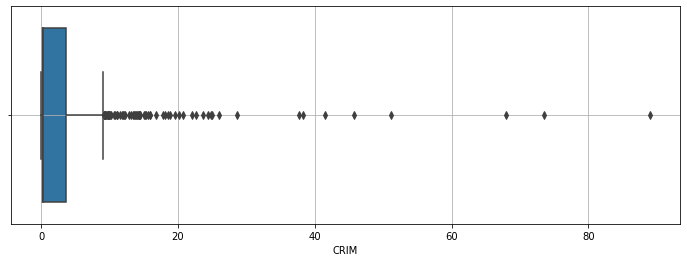

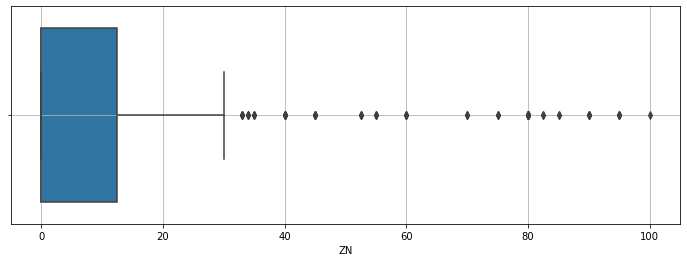

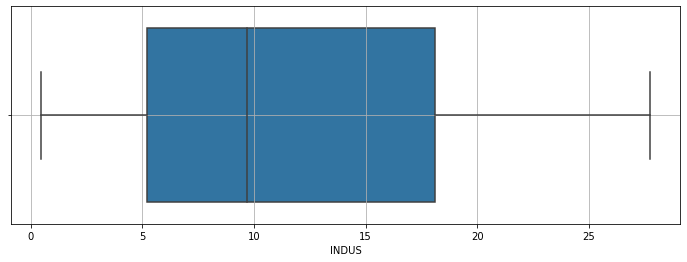

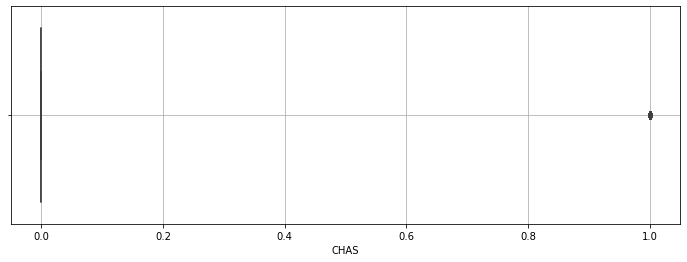

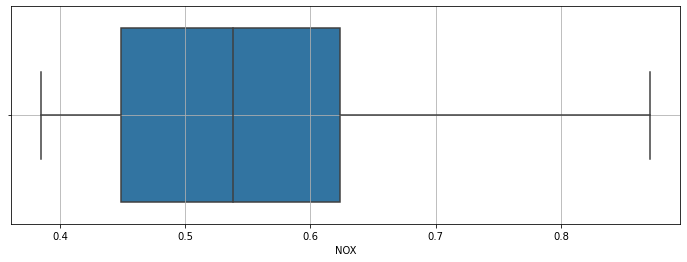

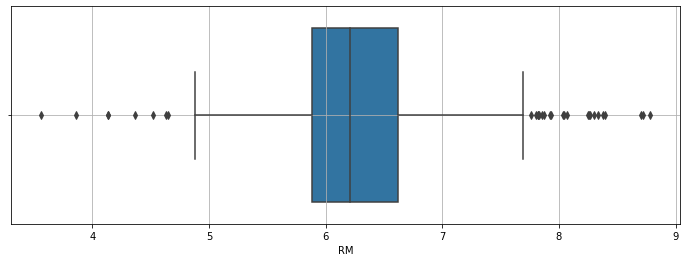

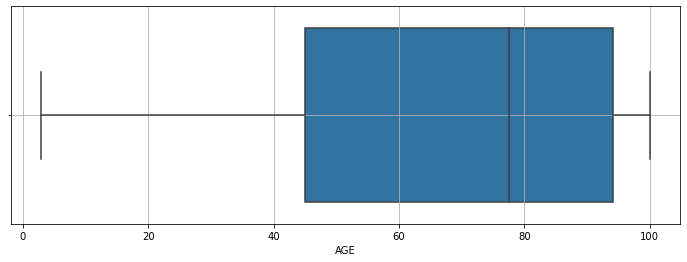

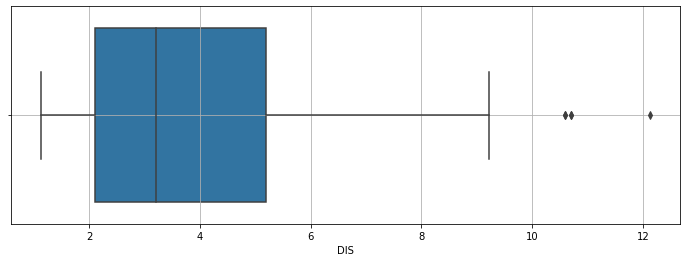

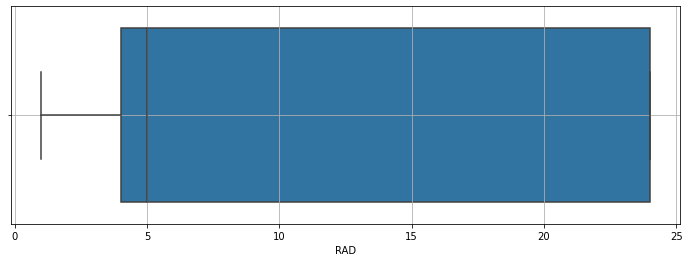

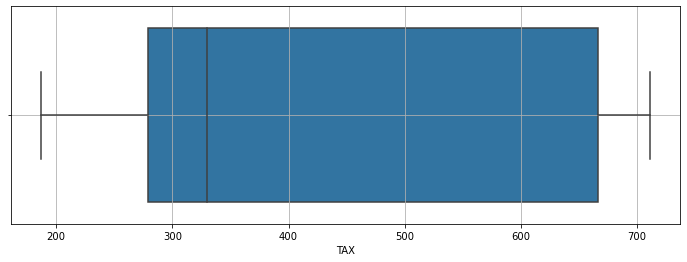

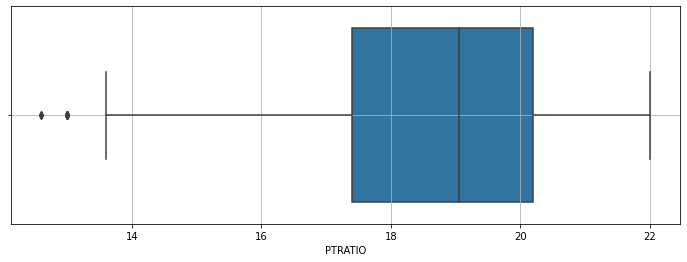

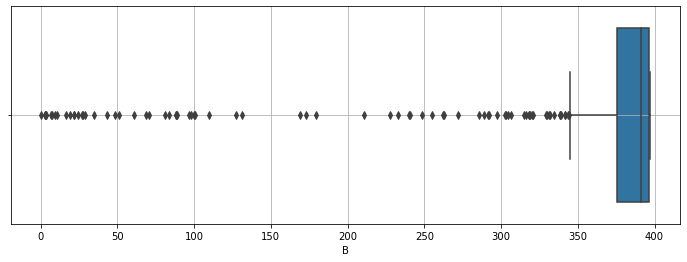

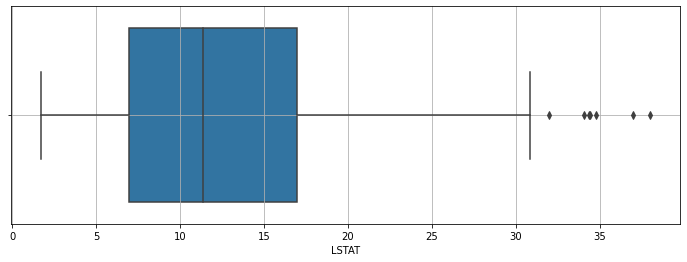

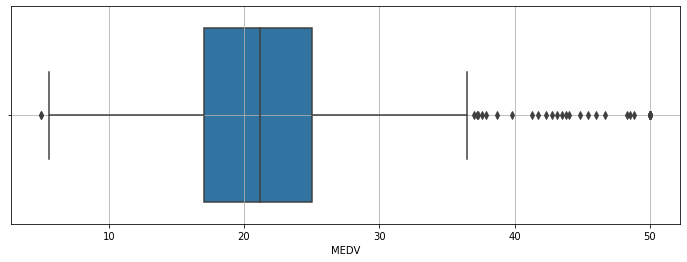

In [11]:
def box_plot(dataset, features = []):
    for feature in  features:       
        plt.figure(figsize = (12, 4))
        sns.boxplot(x = dataset[feature])
        plt.grid()
        plt.show()
        
        
box_plot(data, ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

In [12]:
def detect_outliers(data, features):
    outlier_indices = []
    data["OUTLIER_RANG"] = 0
    
    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = data[(data[feature] < Q1 - outlier_step) | (data[feature] > Q3 + outlier_step)].index
        data.loc[outlier_list_col, "OUTLIER_RANG"] = data.loc[outlier_list_col, "OUTLIER_RANG"] + 1
        
    isolation_forest = data[IsolationForest().fit_predict(data[features]) < 0].index
    data.loc[isolation_forest, "OUTLIER_RANG"] = data.loc[outlier_list_col, "OUTLIER_RANG"] + 1
    data[data["OUTLIER_RANG"].isnull()] = 0
    
    return data

In [13]:
data = detect_outliers(data, ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
                              "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])
data["OUTLIER_RANG"].value_counts()

0.0    317
1.0    130
2.0     38
3.0     12
4.0      8
5.0      1
Name: OUTLIER_RANG, dtype: int64

Разделим датасет на тренировочную и тестовую выборки и посмотрим на результаты.

In [14]:
X = data.drop("MEDV", axis = 1)
Y = data["MEDV"]

model = LinearRegression()

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

model.fit(X_train, Y_train)

print("Train Score:", round(model.score(X_train, Y_train), 4))
print("Test Score:", round(model.score(X_test, Y_test), 4))

Train Score: 0.918
Test Score: 0.8707


Модель сразу же выдала неплохой результат. Добавили мы всего один признак. Попробуем столбцы с малой кардинальностью (CHAS, RAD) преобразовать при помощи One-Hot Encoding.

In [16]:
for feature in X[["CHAS", "RAD"]]:
    dummies = pd.get_dummies(X[feature])
    dummies = dummies.add_prefix(f"{feature}_")
    X.drop(feature, axis = 1, inplace = True)
    X = X.join(dummies)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

model.fit(X_train, Y_train)

print("Train Score:", round(model.score(X_train, Y_train), 4))
print("Test Score:", round(model.score(X_test, Y_test), 4))

Train Score: 0.9254
Test Score: 0.8986


Также попробуем стандартизовать данные.

In [17]:
X_SC = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)

X_train, X_test, Y_train, Y_test = train_test_split(X_SC, Y, test_size = 0.3)

model.fit(X_train, Y_train)

print("Train Score:", round(model.score(X_train, Y_train), 4))
print("Test Score:", round(model.score(X_test, Y_test), 4))

Train Score: 0.9203
Test Score: 0.9164


Как видно, каждая последующая итерация приводила к улучшению модели.